In [1]:
import torch 
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms 
import matplotlib.pyplot as plt 
import numpy as np 

#Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [54]:
#hyper parameters 
EPOCHS = 1
BATCH_SIZE = 4
LR = 0.01

In [55]:
transform = transforms.Compose([transforms.ToTensor()])
train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform = transform)
test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform = transform)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [56]:
mean=np.mean(train_dataset.data, axis=0)
std=np.std(train_dataset.data, axis=0)

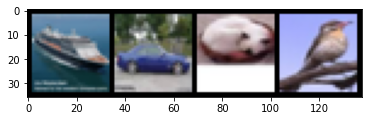

In [57]:
def imshow(img):
    npImg=img.numpy()
    plt.imshow(np.transpose(npImg, (1,2,0)))
    plt.show()

data_iter = iter(train_loader)
images,labels=data_iter.next()
imshow(torchvision.utils.make_grid(images))

In [58]:
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        self.conv1=nn.Conv2d(3,6,5)
        self.pool = nn.MaxPool2d(2,2)
        self.conv2=nn.Conv2d(6,16,5)
        self.fc1=nn.Linear(16*5*5, 128)
        self.fc2=nn.Linear(128, 64)
        self.fc3=nn.Linear(64, 10)
        
    def forward(self, x):
        x=self.pool(F.relu(self.conv1(x)))
        x=self.pool(F.relu(self.conv2(x)))
        x=x.view(-1, 16*5*5)
        x=F.relu(self.fc1(x))
        x=F.relu(self.fc2(x))
        x=self.fc3(x)
        return x
model=ConvNet().to(device)
model

ConvNet(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)

In [59]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr = LR, weight_decay=999e5)

In [60]:
n_total_steps=len(train_loader)
for epoch in range(EPOCHS):
    for i, (images, labels) in enumerate(train_loader):
        images=images.to(device)
        labels=labels.to(device)
        
        output = model(images)
        loss=criterion(output, labels)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        print (f'Epoch [{epoch+1}/{EPOCHS}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')
        break
    break
            
print('Finished Training')
PATH = './cnn.pth'
torch.save(model.state_dict(), PATH)


Epoch [1/1], Step [1/12500], Loss: 2.3166
Finished Training


In [61]:
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    n_class_correct = [0 for i in range(10)]
    n_class_samples = [0 for i in range(10)]
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        # max returns (value ,index)
        _, predicted = torch.max(outputs, 1)
        n_samples += labels.size(0)
        n_correct += (predicted == labels).sum().item()
        
        for i in range(BATCH_SIZE):
            label = labels[i]
            pred = predicted[i]
            if (label == pred):
                n_class_correct[label] += 1
            n_class_samples[label] += 1

    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy of the network: {acc} %')

    for i in range(10):
        acc = 100.0 * n_class_correct[i] / n_class_samples[i]
        print(f'Accuracy of {classes[i]}: {acc} %')

Accuracy of the network: 8.01 %
Accuracy of plane: 0.0 %
Accuracy of car: 0.0 %
Accuracy of bird: 0.0 %
Accuracy of cat: 0.0 %
Accuracy of deer: 7.9 %
Accuracy of frog: 0.0 %
Accuracy of horse: 52.6 %
Accuracy of ship: 0.0 %
Accuracy of truck: 0.4 %


IndexError: tuple index out of range

In [65]:
classes

('plane', 'car', 'bird', 'cat', 'deer', 'frog', 'horse', 'ship', 'truck')